In [ ]:
import glob
import os
import pandas as pd

# List of base filenames (i.e. without " 2002" or ".txt")
file_names = [
    "FFIEC CDR UBPR Ratios Allowance and Loan Mix-a",
    "FFIEC CDR UBPR Ratios Allowance and Loan Mix-b",
    "FFIEC CDR UBPR Ratios Asset Yields and Funding Costs",
    "FFIEC CDR UBPR Ratios Balance Sheet dollar",
    "FFIEC CDR UBPR Ratios Balance Sheet percent",
    "FFIEC CDR UBPR Ratios Capital Analysis-a",
    "FFIEC CDR UBPR Ratios Capital Analysis-b",
    "FFIEC CDR UBPR Ratios Capital Analysis-c",
    "FFIEC CDR UBPR Ratios Capital Analysis-d",
    "FFIEC CDR UBPR Ratios Concentrations of Credit",
    "FFIEC CDR UBPR Ratios Concept Not In Presentation",
    "FFIEC CDR UBPR Ratios Derivative Analysis",
    "FFIEC CDR UBPR Ratios Derivative Instruments",
    "FFIEC CDR UBPR Ratios Executive Summary Report",
    "FFIEC CDR UBPR Ratios Fiduciary Services-a",
    "FFIEC CDR UBPR Ratios Fiduciary Services-b",
    "FFIEC CDR UBPR Ratios Income Statement 1-Qtr-Ann",
    "FFIEC CDR UBPR Ratios Income Statement dollar",
    "FFIEC CDR UBPR Ratios Interest Rate Risk",
    "FFIEC CDR UBPR Ratios Liquidity and Funding",
    "FFIEC CDR UBPR Ratios Liquidity and Inv Portfolio",
    "FFIEC CDR UBPR Ratios Noninterest Income and Expenses",
    "FFIEC CDR UBPR Ratios Off Balance Sheet Items",
    "FFIEC CDR UBPR Ratios PD, Nonacc and Rest Loans-a",
    "FFIEC CDR UBPR Ratios PD, Nonacc and Rest Loans-b",
    "FFIEC CDR UBPR Ratios QTR Income Statement dollar",
    "FFIEC CDR UBPR Ratios Securitization and Asset Sale-a",
    "FFIEC CDR UBPR Ratios Securitization and Asset Sale-b",
    "FFIEC CDR UBPR Ratios Securitization and Asset Sale-c",
    "FFIEC CDR UBPR Ratios Summary Ratios"
]

base_dir = 'UBPR_Ratios'  # or wherever your files live

for filename in file_names:
    # Build the glob pattern for this filename
    pattern = f'**/{filename}*.txt'
    files = glob.glob(os.path.join(base_dir, pattern), recursive=True)
    
    print(files)
    if not files:
        print(f"No files found for pattern: {pattern}")
        continue

    dataframes = []
    for file in files:
        try:
            # Adjust delimiter as needed for your data
            df = pd.read_csv(file, delimiter='\t', header=[0,1])
            dataframes.append(df)
        except Exception as e:
            print(f"Error reading {file}: {e}")

    if dataframes:
        # Concatenate using an outer join to merge all columns
        combined_df = pd.concat(dataframes, axis=0, join='outer', ignore_index=True)
        
        # Save to CSV; e.g. "data/FFIEC CDR UBPR Ratios Allowance and Loan Mix-a Combined.csv"
        out_path = f"data/{filename} Combined.csv"
        combined_df.to_csv(out_path, index=False)
        print(f"Saved combined CSV to: {out_path}")
    else:
        print(f"No valid dataframes for {filename}")


### Usage example

In [2]:
import pandas as pd

In [25]:
cnip_df = pd.read_csv('data\FFIEC CDR UBPR Ratios Noninterest Income and Expenses Combined.csv', index_col=0, header=[0,1])

<>:1: SyntaxWarning: invalid escape sequence '\F'
<>:1: SyntaxWarning: invalid escape sequence '\F'
C:\Users\hai74\AppData\Local\Temp\ipykernel_50600\3944896257.py:1: SyntaxWarning: invalid escape sequence '\F'
  cnip_df = pd.read_csv('data\FFIEC CDR UBPR Ratios Noninterest Income and Expenses Combined.csv', index_col=0, header=[0,1])


In [26]:
# keep only dates in the index
cnip_df.index = pd.to_datetime(
    cnip_df.index,
    format="%m/%d/%Y %I:%M:%S %p"
).date

In [27]:
# the second layer of the keys provide explaination to the UBPR code
# which you can also find it here https://cdr.ffiec.gov/public/DownloadUBPRUserGuide.aspx
# we can drop that to make querying easier
cnip_df.columns = cnip_df.columns.droplevel(1)

In [34]:
bank_name = 'Ally Bank'
bank_id = 3284070

metric_name = 'Efficiency Ratio'
metric_code = 'UBPRE088'

series = cnip_df.loc[cnip_df['ID RSSD'] == bank_id, metric_code]

In [35]:
series.sort_index(inplace=True)

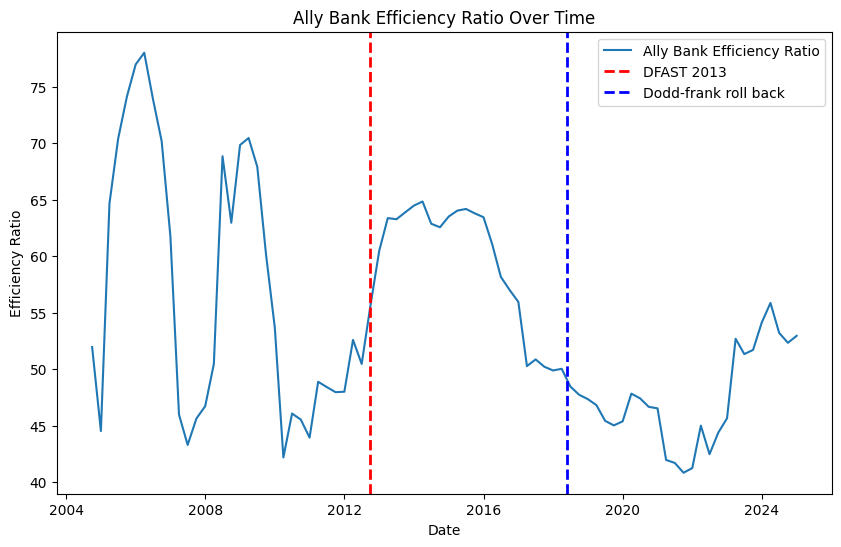

In [36]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
series.plot(ax=ax, label=f'{bank_name} {metric_name}')

vline_date_1 = pd.to_datetime('2012-09-30')
ax.axvline(x=vline_date_1, color='red', linestyle='--', linewidth=2, label='DFAST 2013')

vline_date_2 = pd.to_datetime('2018-05-24')
ax.axvline(x=vline_date_2, color='blue', linestyle='--', linewidth=2, label='Dodd-frank roll back')

ax.set_title(f'{bank_name} {metric_name} Over Time')
ax.set_xlabel('Date')
ax.set_ylabel(metric_name)
ax.legend()

plt.show()